D:\OneDrive - Cardiff University\05 - Python\08 - National Grid
D:
OneDrive - Cardiff University
05 - Python
08 - National Grid
D:\


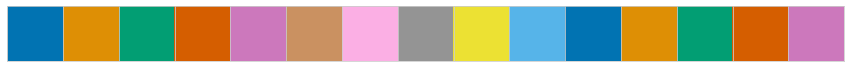

In [1]:
import numpy as np
import pandas as pd
import os
import sys
import datetime as dt

computer_path = os.getcwd()

sys.path.append(computer_path os.path.sep + r"Functions")
import profiles as pr

### Creation of the profiles using the machine learning models built for each technology and a daily temperature profile
the ASHPs and GSHps are designed for a -3.2C OAT

In [75]:
target_year = # add target year
temperature_df = # add temperature profile for the target year at daily resolution with a "Temperature" column and "Date" column

In [76]:
synthesized_df = pr.get_skeleton_df(target_year)
synthesized_df = pd.merge(synthesized_df, temperature_df , left_on="Date", right_on="Date", how="left")
synthesized_df["Temperature"] = synthesized_df["Temperature"].fillna(method="ffill")
synthesized_df.set_index("index", inplace=True, drop=True)

print("Calculate correction factor...")
# Calculate the correction factor based on heating degree days
nb_degree_days_SAP_UK = pr.get_nb_degree_days(temperatures_month_UK, target_year)
correction_factor = 1+(pr.get_nb_degree_days(synthesized_df["Temperature"].resample('1m').mean().values.ravel(), target_year)-nb_degree_days_SAP_UK)/nb_degree_days_SAP_UK
print(correction_factor, nb_degree_days_SAP_UK, pr.get_nb_degree_days(synthesized_df["Temperature"] .resample('1m').mean().values.ravel(), target_year))
print(synthesized_df.shape)
synthesized_df.reset_index(inplace=True)

synthesized_df = pr.add_technology_profiles(synthesized_df)
synthesized_df.set_index("index", inplace=True, drop=True)

D:\OneDrive - Cardiff University/05 - Python/01 - Packages/Functions\functions.py:31: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  data["Week"] = data.index.week


Calculate correction factor...
0.9612027158098941 2062.0 1982.0000000000018
(17520, 22)
boiler
Quantiles_list: [0.95]
ASHP_heat
Quantiles_list: [0.95, 0.9]
resistance_heater
Quantiles_list: [0.9]
GSHP_heat
Quantiles_list: [0.9]
LargeHP_heat
Quantiles_list: [0.9]
ASHP_elec
Quantiles_list: [0.95, 0.9]
GSHP_elec
Quantiles_list: [0.9]
LargeHP_elec
Quantiles_list: [0.9]


### Normalisation of the profiles

In [77]:
synthesized_df["Gas_boiler_heat"] = synthesized_df["boiler"]
synthesized_df["Gas_boiler_gas"] = synthesized_df["boiler"]/0.84
synthesized_df["Resistance_heater_heat"] = synthesized_df["resistance_heater"]
synthesized_df["Resistance_heater_elec"] = synthesized_df["resistance_heater"]
## Normalisation
technologies_dict = {"ASHP_heat": "ASHP_elec",
                    "GSHP_heat": "GSHP_elec",
                    "Resistance_heater_heat": "Resistance_heater_elec",
                    "Gas_boiler_heat": "Gas_boiler_gas"}

cols_to_export = []
for t_heat, t_energy in technologies_dict.items():
    print(t_heat, t_energy)
    # normalisation of heat 
    synthesized_df["Normalised_"+t_heat] = synthesized_df[t_heat]/synthesized_df[t_heat].sum()*correction_factor
    # normalisation of elec
    synthesized_df["Normalised_"+t_energy] = synthesized_df[t_energy]/synthesized_df[t_heat].sum()*correction_factor
    
    cols_to_export.append("Normalised_"+t_heat)
    cols_to_export.append("Normalised_"+t_energy)

ASHP_heat ASHP_elec
GSHP_heat GSHP_elec
Resistance_heater_heat Resistance_heater_elec
Gas_boiler_heat Gas_boiler_gas


In [ ]:
synthesized_df